In [1]:
%matplotlib widget

In [2]:
isdark = True

In [3]:
from rayoptics.environment import *

In [4]:
root_pth = Path(rayoptics.__file__).resolve().parent

In [5]:
opm = OpticalModel()
sm  = opm.seq_model
osp = opm.optical_spec
pm = opm.parax_model

In [6]:
pupil_diameter = 80.
pupil_radius = pupil_diameter/2
osp.pupil = PupilSpec(osp, key=['object', 'pupil'], value=pupil_diameter)

# single view
osp.field_of_view = FieldSpec(osp, key=['object', 'angle'], flds=[0.])

# wavelength: 550nm
osp.spectral_region = WvlSpec([(550.0, 1.0)], ref_wl=0)

In [7]:
sm.gaps[0].thi=1e10

In [8]:
#offset_aperture = srf.Circular(radius=pupil_diameter, y_offset=3.)
mirror_perturb = srf.DecenterData('dec and return')

In [9]:
mirror_perturb.euler[0] = 20  # tilt 20 degrees about the y axis?

In [10]:
opm.add_mirror(lbl='PRIMARY', r=-100., profile=Spherical, t=-40.)
opm.add_mirror(lbl='SECONDARY', profile=Spherical, c=-0.079, t=65.)
opm.add_mirror(lbl='TERTIARY', profile=Spherical, c=-0.00, t=20., decenter=mirror_perturb, sd=pupil_diameter)

In [11]:
opm.update_model()

In [12]:
sm.list_model()

              c            t        medium     mode   zdr      sd
  Obj:     0.000000  1.00000e+10       air             1      0.0000
PRIMARY:    -0.010000     -40.0000       air    reflect -1      40.000
SECONDARY:    -0.079000      65.0000       air    reflect  1      4.8362
TERTIARY:    -0.000000      20.0000       air    reflect -1      2.4436
  Img:    -0.000000      0.00000                      -1      21.211


In [13]:
sm.list_sg()

               c               mode              type          y       alpha
                       t           medium
  Obj:      0.00000                 
                 1.00000e+10          air
PRIMARY:   -0.0100000          reflect
                    -40.0000          air
SECONDARY:   -0.0790000          reflect
                     65.0000          air
TERTIARY:     -0.00000          reflect     dec and return     0.0000     20.000
                     20.0000          air
  Img:     -0.00000                 


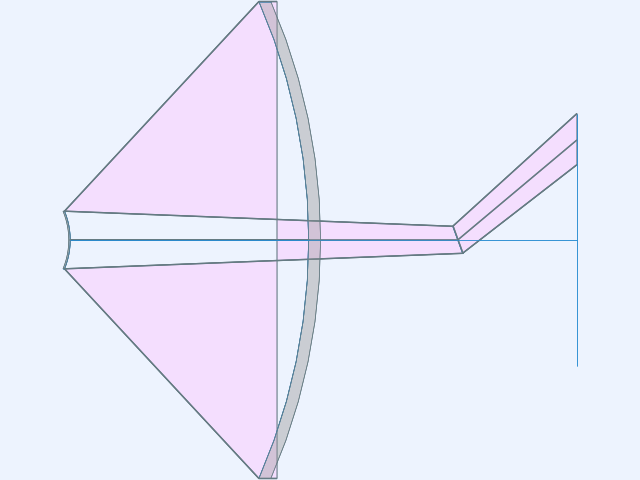

In [14]:
plt.ion()
layout_plt = plt.figure(FigureClass=InteractiveLayout, opt_model=opm,
                        do_draw_rays=True, do_paraxial_layout=False).plot()

In [15]:
s3=sm.ifcs[3]
print(s3)

Surface(lbl='TERTIARY', profile=Spherical(c=-0.0), interact_mode='reflect')


In [16]:
print(s3.decenter)

'dec and return': Decenter: array([0., 0., 0.]), Tilt: array([20.,  0.,  0.])


In [17]:
print(mirror_perturb)

'dec and return': Decenter: array([0., 0., 0.]), Tilt: array([20.,  0.,  0.])


In [18]:
sm.list_gaps()

0 Gap(t=10000000000.0, medium=Air())
1 Gap(t=-40.0, medium=Air())
2 Gap(t=65.0, medium=Air())
3 Gap(t=20.0, medium=Air())


In [19]:
sm.list_decenters()

              thi    medium/mode          type          y       alpha
    0:  1.00000e+10          air
    1:     -40.0000          air
    2:      65.0000          air
    3:                   reflect  dec and return     0.0000     20.000
    3:      20.0000          air
    4:                     dummy


In [20]:
sm.list_surfaces()

0 Surface(lbl='Obj', profile=Spherical(c=0.0), interact_mode='dummy')
1 Surface(lbl='PRIMARY', profile=Spherical(c=-0.01), interact_mode='reflect')
2 Surface(lbl='SECONDARY', profile=Spherical(c=-0.079), interact_mode='reflect')
3 Surface(lbl='TERTIARY', profile=Spherical(c=-0.0), interact_mode='reflect')
4 Surface(lbl='Img', profile=Spherical(c=-0.0), interact_mode='dummy')
